# Imports and technical setup

In [1]:
from pathlib import Path
persist_path = Path('..') / 'persist'
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
from IPython.display import display
import matplotlib.pyplot as plt
import sys
project_root = str(Path(sys.path[0]).parents[0].absolute())
if project_root not in sys.path:
    sys.path.append(project_root)
from importlib import reload
import scripts.utils as utils
from bokeh.io import output_notebook, show
output_notebook()
from functools import partial

Loading BokehJS ...

# Construction d'un indicateur "taux de web"

In [278]:
orders = pd.read_pickle(persist_path / 'orders.pkl')
# orders

In [2]:
day_orders = pd.read_pickle(persist_path / 'day_order.pkl')
day_orders

indicators                    weight                    margin               \
origin2                          EDI       TV   VR  WEB    EDI      TV   VR   
orgacom client     date                                                       
1ALO    0000015304 2017-07-03    0.0  190.642  0.0  0.0    0.0  202.80  0.0   
                   2017-07-04    0.0   24.200  0.0  0.0    0.0   33.70  0.0   
                   2017-07-05    0.0  112.550  0.0  0.0    0.0   86.73  0.0   
                   2017-07-06    0.0    6.200  0.0  0.0    0.0   17.55  0.0   
                   2017-07-07    0.0   27.000  0.0  0.0    0.0   13.77  0.0   
...                              ...      ...  ...  ...    ...     ...  ...   
2BRE    SL009N     2020-08-26    0.0    0.000  0.0  0.0    0.0    0.00  0.0   
                   2020-08-27    0.0  103.950  0.0  0.0    0.0   61.10  0.0   
                   2020-08-28    0.0    0.000  0.0  0.0    0.0    0.00  0.0   
                   2020-08-31    0.0   40.500  0.0  0.0    0.0   10.51  0.0   
        SLD008B    2018-09-14    0.0    4.400  0.0  0.0    0.0    3.82  0.0   

indicators                         brutrevenue                     
origin2                        WEB         EDI       TV   VR  WEB  
orgacom client     date                                            
1ALO    0000015304 2017-07-03  0.0         0.0  1340.95  0.0  0.0  
                   2017-07-04  0.0         0.0   196.54  0.0  0.0  
                   2017-07-05  0.0         0.0   916.78  0.0  0.0  
                   2017-07-06  0.0         0.0    73.36  0.0  0.0  
                   2017-07-07  0.0         0.0    73.17  0.0  0.0  
...                            ...         ...      ...  ...  ...  
2BRE    SL009N     2020-08-26  0.0         0.0     0.00  0.0  0.0  
                   2020-08-27  0.0         0.0   629.91  0.0  0.0  
                   2020-08-28  0.0         0.0     0.00  0.0  0.0  
                   2020-08-31  0.0         0.0    75.03  0.0  0.0  
        SLD008B    2018-09-14  0.0         0.0    70.05  0.0  0.0  

[15650027 rows x 12 columns]

In [21]:
oc, clt = '1ALO', '0000170669'

In [176]:
sum(~toto.inactive)

773

In [192]:
toto.where(toto.inactive, np.nan).loc[:, [('brutrevenue', 'WEB'), ('brutrevenue', 'total')]]

indicators                    brutrevenue      
origin2                               WEB total
orgacom client     date                        
1ALO    0000170669 2017-07-05         NaN   NaN
                   2017-07-06         NaN   NaN
                   2017-07-07         NaN   NaN
                   2017-07-10         NaN   NaN
                   2017-07-11         NaN   NaN
...                                   ...   ...
                   2020-08-24         NaN   NaN
                   2020-08-25         NaN   NaN
                   2020-08-26         NaN   NaN
                   2020-08-27         NaN   NaN
                   2020-08-28         NaN   NaN

[823 rows x 2 columns]

In [166]:
toto = day_orders.loc[oc, clt, :].copy()
toto['inactive'] = False
toto.iloc[200:250].loc[:, 'inactive'] = True

/var/lib/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


<AxesSubplot:xlabel='date'>

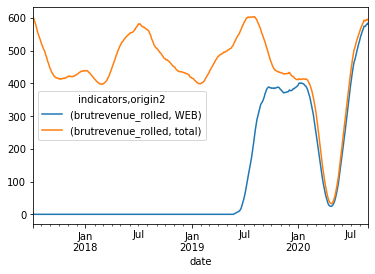

In [208]:
test.loc[(oc, clt), [('brutrevenue_rolled', 'WEB'), ('brutrevenue_rolled', 'total')]].plot(kind='line')

<AxesSubplot:xlabel='date'>

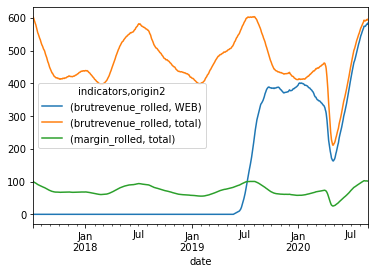

In [272]:
test.loc[(oc, clt),
         [
             ('brutrevenue_rolled', 'WEB'),
             ('brutrevenue_rolled', 'total'),
             ('margin_rolled', 'total')
         ]
        ].plot(kind='line')

In [292]:
reload(utils)
test = utils.day_orders_pipe(
    data=day_orders.loc[oc, clt, :],
    inactive_duration=20.,
    indicator_status='brutrevenue',
    origin='WEB',
    indicator_perf='margin',
    inactive_roll_mode='ignore',
    roll_parms=dict(
        window=75,
        center=True,
        win_type='triang',
        min_periods=1,
    )
)
test

2020-10-21 17:02:47.737933: Computing inactive periods
2020-10-21 17:02:47.743790: Done! Elapsed: 0:00:00.005866


indicators                    margin                              brutrevenue  \
origin2                          EDI      TV   VR     WEB   total         EDI   
orgacom client     date                                                         
1ALO    0000170669 2017-07-05    0.0  293.43  0.0    0.00  293.43         0.0   
                   2017-07-06    0.0    0.00  0.0    0.00    0.00         0.0   
                   2017-07-07    0.0  184.05  0.0    0.00  184.05         0.0   
                   2017-07-10    0.0    0.00  0.0    0.00    0.00         0.0   
                   2017-07-11    0.0  207.13  0.0    0.00  207.13         0.0   
...                              ...     ...  ...     ...     ...         ...   
                   2020-08-24    0.0    0.00  0.0    0.00    0.00         0.0   
                   2020-08-25    0.0    0.00  0.0  234.12  234.12         0.0   
                   2020-08-26    0.0    0.00  0.0    0.00    0.00         0.0   
                   2020-08-27    0.0    0.00  0.0    0.00    0.00         0.0   
                   2020-08-28    0.0    0.00  0.0  119.44  119.44         0.0   

indicators                                                    inactive  \
origin2                             TV   VR      WEB    total            
orgacom client     date                                                  
1ALO    0000170669 2017-07-05  1724.11  0.0     0.00  1724.11    False   
                   2017-07-06     0.00  0.0     0.00     0.00    False   
                   2017-07-07  1111.67  0.0     0.00  1111.67    False   
                   2017-07-10     0.00  0.0     0.00     0.00    False   
                   2017-07-11  1194.49  0.0     0.00  1194.49    False   
...                                ...  ...      ...      ...      ...   
                   2020-08-24     0.00  0.0     0.00     0.00    False   
                   2020-08-25     0.00  0.0  1509.22  1509.22    False   
                   2020-08-26     0.00  0.0     0.00     0.00    False   
                   2020-08-27     0.00  0.0     0.00     0.00    False   
                   2020-08-28     0.00  0.0  1174.47  1174.47    False   

indicators                    brutrevenue_rolled             margin_rolled  \
origin2                                      WEB       total         total   
orgacom client     date                                                      
1ALO    0000170669 2017-07-05           0.000000  601.914008     99.409109   
                   2017-07-06           0.000000  597.778663     98.657648   
                   2017-07-07           0.000000  594.748550     98.094779   
                   2017-07-10           0.000000  590.053592     97.260954   
                   2017-07-11           0.000000  586.393749     96.602435   
...                                          ...         ...           ...   
                   2020-08-24         579.237860  593.887463    102.001325   
                   2020-08-25         581.250530  595.197703    102.037527   
                   2020-08-26         580.439717  593.642052    101.626916   
                   2020-08-27         582.092494  594.498985    101.616452   
                   2020-08-28         584.693644  596.242632    101.742092   

indicators                    WEB_percentage     status  
origin2                                                  
orgacom client     date                                  
1ALO    0000170669 2017-07-05       0.000000     no_web  
                   2017-07-06       0.000000     no_web  
                   2017-07-07       0.000000     no_web  
                   2017-07-10       0.000000     no_web  
                   2017-07-11       0.000000     no_web  
...                                      ...        ...  
                   2020-08-24       0.975333  exclusive  
                   2020-08-25       0.976567  exclusive  
                   2020-08-26       0.977760  exclusive  
                   2020-08-27       0.9

In [16]:
%%time
# 30 seconds
day_orders = (
    day_orders.join(
        pd.concat([day_orders.groupby('indicators', axis=1).sum()], keys=['total'], axis=1).swaplevel(axis=1)
    ).sort_index(axis=1)
)
# day_orders

CPU times: user 12.2 s, sys: 3.03 s, total: 15.2 s
Wall time: 15.2 s


In [5]:
reload(utils)

<module 'scripts.utils' from '/home/pmasse/WebOrNot/scripts/utils.py'>

In [6]:
%%time
# 1:30 mins
rolled = (
utils.compute_rolling_percentage(
    data=day_orders,
    window=100, 
    win_type='triang',
    indicator='brutrevenue',
    axis='WEB',
    roll_kwargs=dict(center=True),
    groupers=['orgacom', 'client'],
).rename('percentage')
)

CPU times: user 1min 3s, sys: 3.96 s, total: 1min 7s
Wall time: 1min 7s


NameError: name 'rolled' is not defined

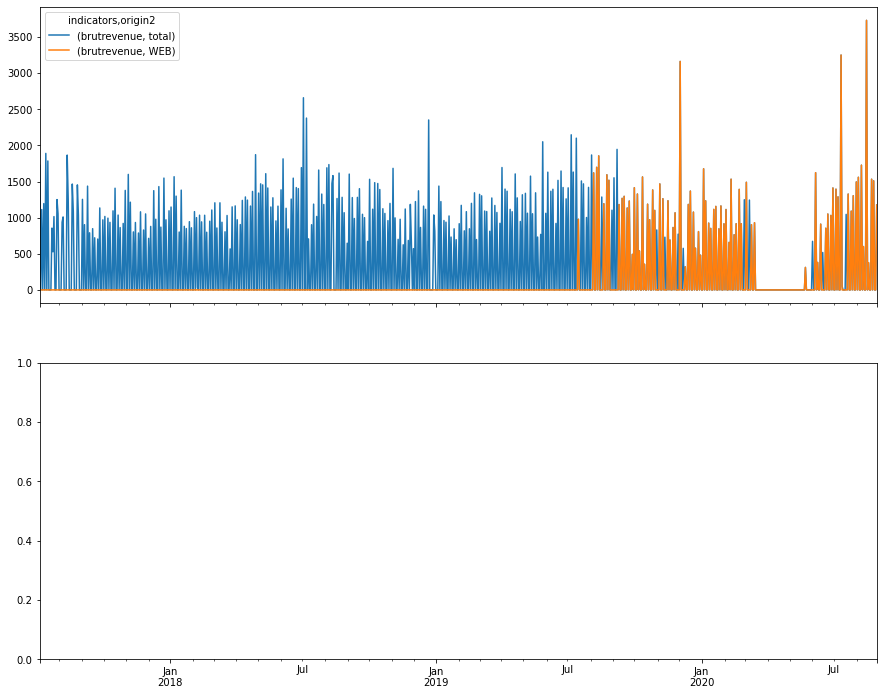

In [20]:
oc, clt = '1ALO', '0000020575'
oc, clt = '1ALO', '0000020531'
oc, clt = '1ALO', '0000024795'
oc, clt = '1ALO', '0000170669'
# oc, clt = list(rolled.loc[rolled != 0]
#                      .index.to_frame()
#                      .loc[lambda x: x.client.str[0] != 'P', ['orgacom', 'client']].drop_duplicates().sample(1).iloc[0])
fig, axs = plt.subplots(nrows=2, figsize=(15, 12), sharex=True)
day_orders.loc[(oc, clt), [('brutrevenue', 'total'), ('brutrevenue', 'WEB')]].plot(kind='line', ax=axs[0])
rolled.loc[(oc, clt)].plot(kind='line', ax=axs[1])
# ax.set_xlim(pd.to_datetime('2018-03-01'), pd.to_datetime('2018-05-31'))
axs[0].set_xticklabels([])
axs[1].set_ylim(0, 1.05)
print(oc, clt)
with pd.option_context('display.max_rows', None):
    display(orders.loc[(oc, clt), ['origin2', 'brutrevenue', ]])

In [8]:
%%time
reload(utils)

inactive=utils.mask_successive_values(ds=day_orders[('brutrevenue', 'total')],
                                 groupers=['orgacom', 'client'], 
                                 count=20,
                                 value=0.,
                                )
inactive

CPU times: user 4.3 s, sys: 2.08 s, total: 6.38 s
Wall time: 6.38 s


orgacom  client      date      
1ALO     0000015304  2017-07-03    False
                     2017-07-04    False
                     2017-07-05    False
                     2017-07-06    False
                     2017-07-07    False
                                   ...  
2BRE     SL009N      2020-08-26     True
                     2020-08-27    False
                     2020-08-28    False
                     2020-08-31    False
         SLD008B     2018-09-14    False
Length: 15650027, dtype: bool

In [9]:
%%time
# 10 sec
full_stat=(
utils.compute_stat_from_percentage(
    rolled,
    mode='cut',
).astype('str').where(~inactive, 'inactive')
).rename('status')

CPU times: user 6.53 s, sys: 3.01 s, total: 9.54 s
Wall time: 9.54 s


In [10]:
full_stat = full_stat.reset_index().sort_values(['orgacom', 'client', 'date'])

In [11]:
%%time
# 40 sec
status_updates = utils.get_first_rupture_from_group(
                        df=full_stat.sample(frac=1),
                        groupers=['orgacom', 'client'],
                        order_keys=['date'],
                        targets=['status'],
                    ).set_index(['orgacom', 'client', 'date'])

CPU times: user 31 s, sys: 3.13 s, total: 34.1 s
Wall time: 34.1 s


In [12]:
status_updates = status_updates.reset_index()
groupers = ['orgacom', 'client']
same_clt = (status_updates[groupers].shift(-1) == status_updates[groupers]).all(axis=1)
status_updates['end_date'] = status_updates['date'].shift(-1).where(same_clt, None)
status_updates

,orgacom,client,date,status,end_date
0,1ALO,0000015304,2017-07-03,no_web,NaT
1,1ALO,0000015982,2018-03-20,no_web,NaT
2,1ALO,0000016309,2017-07-03,no_web,2017-07-04
3,1ALO,0000016309,2017-07-04,inactive,2017-08-28
4,1ALO,0000016309,2017-08-28,no_web,2018-06-28
...,...,...,...,...,...
231528,2BRE,SL009N,2020-06-24,inactive,2020-07-28
231529,2BRE,SL009N,2020-07-28,no_web,2020-07-29
231530,2BRE,SL009N,2020-07-29,inactive,2020-08-27
231531,2BRE,SL009N,2020-08-27,no_web,NaT


In [22]:
%%time
# 2 min
roll_perf = day_orders.loc[:, idx[:, 'total']].groupby(['orgacom', 'client']).apply(
    lambda x: x.rolling(100, win_type='triang', min_periods=15, center=True).mean()
)
roll_perf

CPU times: user 1min 39s, sys: 3.79 s, total: 1min 43s
Wall time: 1min 43s


indicators                    brutrevenue     margin      weight
origin2                             total      total       total
orgacom client     date                                         
1ALO    0000015304 2017-07-03  616.959604  80.966808  103.838702
                   2017-07-04  616.565233  80.890977  103.770623
                   2017-07-05  615.801513  80.724993  103.667102
                   2017-07-06  615.100785  80.584052  103.600757
                   2017-07-07  614.652247  80.515593  103.605417
...                                   ...        ...         ...
2BRE    SL009N     2020-08-26   31.927302   3.749920    6.989612
                   2020-08-27   32.579140   3.717331    7.096468
                   2020-08-28   32.833309   3.639900    7.138926
                   2020-08-31   32.646787   3.512532    7.110022
        SLD008B    2018-09-14         NaN        NaN         NaN

[15650027 rows x 3 columns]

In [17]:
%%time
# 2 min
roll_perf2 = day_orders.loc[:, idx[:, 'total']].where(~inactive, np.nan).groupby(['orgacom', 'client']).apply(
    lambda x: x.rolling(100, win_type='triang', min_periods=15, center=True).mean()
)
roll_perf2

CPU times: user 1min 37s, sys: 4.21 s, total: 1min 41s
Wall time: 1min 41s


indicators                    brutrevenue     margin      weight
origin2                             total      total       total
orgacom client     date                                         
1ALO    0000015304 2017-07-03  616.959604  80.966808  103.838702
                   2017-07-04  616.565233  80.890977  103.770623
                   2017-07-05  615.801513  80.724993  103.667102
                   2017-07-06  615.100785  80.584052  103.600757
                   2017-07-07  614.652247  80.515593  103.605417
...                                   ...        ...         ...
2BRE    SL009N     2020-08-26         NaN        NaN         NaN
                   2020-08-27         NaN        NaN         NaN
                   2020-08-28         NaN        NaN         NaN
                   2020-08-31         NaN        NaN         NaN
        SLD008B    2018-09-14         NaN        NaN         NaN

[15650027 rows x 3 columns]

<AxesSubplot:xlabel='date'>

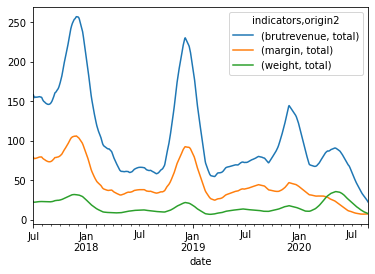

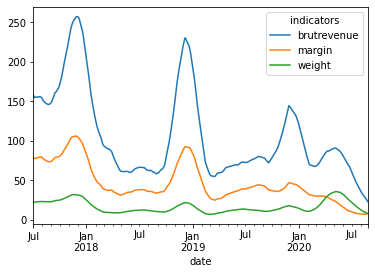

In [34]:
roll_perf.loc[oc, clt].plot(kind='line')
roll_perf2.loc[oc, clt].plot(kind='line')

In [19]:
roll_perf2.columns = roll_perf2.columns.droplevel(1)
roll_perf2

indicators                     brutrevenue     margin      weight
orgacom client     date                                          
1ALO    0000015304 2017-07-03   616.959604  80.966808  103.838702
                   2017-07-04   616.565233  80.890977  103.770623
                   2017-07-05   615.801513  80.724993  103.667102
                   2017-07-06   615.100785  80.584052  103.600757
                   2017-07-07   614.652247  80.515593  103.605417
...                                    ...        ...         ...
2BRE    SL009N     2020-08-26          NaN        NaN         NaN
                   2020-08-27          NaN        NaN         NaN
                   2020-08-28          NaN        NaN         NaN
                   2020-08-31          NaN        NaN         NaN
        SLD008B    2018-09-14          NaN        NaN         NaN

[15650027 rows x 3 columns]

In [20]:
roll_perf2 = roll_perf2.reset_index()

In [279]:
reload(utils)
show(partial(utils.bk_detail,
             data=orders.reset_index().loc[
#                  (orders.reset_index().date >= pd.to_datetime('2017-01-01')) &
#                  (orders.reset_index().date <= pd.to_datetime('2019-12-31')) &
                 (orders.reset_index().client == clt)
             ],
             rolled=rolled.rename('percentage').loc[(oc, clt)].reset_index(),
             client=clt,
             status_updates=status_updates.loc[(status_updates.client == clt) & (status_updates.orgacom == oc)],
             roll_perf=roll_perf2.loc[(roll_perf2.client == clt) & (roll_perf2.orgacom == oc)],
            ),
     notebook_url="http://devdm:8888")

TypeError: Index(...) must be called with a collection of some kind, 'percentage' was passed

In [52]:
test = pd.Series(
    [1., 2., 2., np.nan, 1., 1.],
    index=range(6)
)

In [53]:
test

0    1.0
1    2.0
2    2.0
3    NaN
4    1.0
5    1.0
dtype: float64

In [54]:
test.rolling(3, center=True, min_periods=1).mean()

0    1.500000
1    1.666667
2    2.000000
3    1.500000
4    1.000000
5    1.000000
dtype: float64

In [ ]:
test = day_orders.loc[('1ALO', '0000020555'), [('brutrevenue', 'WEB'), ('brutrevenue', 'total')]]
test.columns = test.columns.droplevel(level=0)
test2 = test.rolling(30, min_periods=1, win_type='triang').sum()
(test2['WEB'] / test2['total']).fillna(0)

In [ ]:
day_orders.loc[('1ALO', '0000020555')]
rolled.loc[('1ALO', '0000020555')]

In [ ]:
rolled.loc[(rolled >= 1.)]

In [ ]:
rolled.loc[rolled != 0].index.get_level_values(1).unique()[:30]

In [ ]:
df = day_orders.loc[:, 'brutrevenue'].copy()
print(df.shape)
print(df.sum(axis=1).shape)
df['total'] = 3 #df.sum(axis=1).rename((indicator, 'total'))
# df = df[(indicator, axis), (indicator, 'total')]
df

In [ ]:
df[('brutrevenue', 'total')] = df.sum(axis=1).rename(('brutrevenue', 'total'))

In [ ]:
%%time
rolled2 = (
    toto.groupby(['orgacom', 'client'], observed=True)
        .transform(lambda x: x.rolling(5, win_type='triang').mean())
)
rolled2

In [ ]:
pd.concat(
    [day_orders.loc[idx['2BRE', 'SL008C', :], [('brutrevenue', 'WEB'), ('brutrevenue', 'total')]],
     day_orders.loc[idx['2BRE', 'SL009N', :], [('brutrevenue', 'WEB'), ('brutrevenue', 'total')]],
    ]
).groupby(['orgacom', 'client']).rolling(5, win_type='triang').mean()

In [ ]:
smol_data = day_orders.loc[[('2BRE', 'SL009N', slice(None)), ('2BRE', 'SL008C')]]

In [ ]:
smol_data = day_orders.loc[('2BRE', 'SL009N'), ('2BRE', 'SL008C')]
smol_data[[('brutrevenue', 'WEB'), ('brutrevenue', 'total')]].plot(kind='line')
smol_data.loc[smol_data[('brutrevenue', 'WEB')] != 0]

In [ ]:
smol_data[('brutrevenue', 'WEB')].rolling(5, win_type='triang').mean()

In [ ]:
rolled.loc[('2BRE', 'SL009N')].plot(kind='line')

In [ ]:
day_orders.loc[('2BRE', 'SL008R')]

In [ ]:
day_orders.loc[('2BRE')].index.get_level_values(0).unique()

In [ ]:
len(to_list[1])

In [ ]:
day_orders = day_orders.sort_index()

In [ ]:
%time
toto = day_orders.tail(50000).copy()
toto
rolled2 = (
    toto.loc[:, ('brutrevenue', 'WEB')]  # .loc[:, ['WEB', 'total']]
        .groupby(['orgacom', 'client'], observed=True)
        .rolling(5, win_type='triang')
        .mean()    
        .reset_index()
        .drop(['orgacom', 'client'], axis=1)
)

print(rolled2)

In [ ]:
rolled2.loc[rolled2[('brutrevenue', 'WEB')] > 0].index.get_level_values(1).unique()

In [ ]:
rolled2.loc[idx[:, '0000020511', :], ('brutrevenue', 'WEB')].plot(kind='line')

In [ ]:

# to_list = list(zip(*rolled2.level_2.to_list()))
# rolled2['orgacom'] = to_list[0]
# rolled2['client'] = to_list[1]
# rolled2['date'] = to_list[2]
# rolled2 = rolled2.drop('level_2', axis=1).set_index(['orgacom', 'client', 'date'])

In [ ]:
%%time
in_df = day_orders.tail(50000)
rolled = (
    in_df.loc[:, ('brutrevenue', 'WEB')]  # .loc[:, ['WEB', 'total']]
        .groupby(['orgacom', 'client'], observed=True)
        .rolling(5, win_type='triang')
        .mean()    
        .reset_index()
        .drop(['orgacom', 'client'], axis=1)
)

to_list = list(zip(*rolled.level_2.to_list()))
rolled['orgacom'] = to_list[0]
rolled['client'] = to_list[1]
rolled['date'] = to_list[2]
rolled = rolled.drop('level_2', axis=1).set_index(['orgacom', 'client', 'date'])
rolled 

In [ ]:
day_orders.loc[idx['2BRE', 'SL009N'], ('brutrevenue', 'WEB')].rolling(5,).mean()

In [ ]:
rolled.loc[idx['2BRE', 'SL009N']]

In [ ]:
(
day_orders.loc[:, ('brutrevenue', 'WEB')].to_frame()
.groupby(['orgacom', 'client']).rolling(5, win_type='triang').mean()
)

In [ ]:
(
day_orders.loc[idx['2BRE', ('SL009N', 'SL008R')], ('brutrevenue', 'WEB')].to_frame()
.groupby(['orgacom', 'client']).rolling(5, win_type='triang').mean()
)

In [ ]:
day_orders.loc[idx['2BRE', ('SL009N', 'SL008R')], ('brutrevenue', 'WEB')].to_frame().rolling(5, win_type='triang').mean()

In [ ]:
day_orders.loc[idx['2BRE', 'SL009N'], ('brutrevenue', 'WEB')].to_frame().rolling(5, win_type='triang').mean()

In [ ]:
rolled['percentage'] = rolled['WEB'] / rolled['total']
rolled

In [ ]:
rolled.loc[rolled.WEB > 0]

In [ ]:
orders = pd.read_pickle(persist_path / 'orders.pkl')

In [ ]:
rolled.loc[('2BRE', 'SL009N')]

In [ ]:
day_orders.loc[('2BRE', 'SL009N')].rolling(5, win_type='triang').mean()

In [ ]:
orders.loc[('2BRE', 'SL009N'), ['origin2', 'brutrevenue']]

In [ ]:
test1 = pd.DataFrame(
    {
        'rev': [*list([0.] * 6), 5., *list([0.] * 993)],
        'group': ['a'] * 1000,
        'date': pd.date_range(start=pd.to_datetime('2010-01-01'), periods=1000, freq='B')
    }
)
test2 = pd.DataFrame(
    {
        'rev': [0.] * 1000,
        'group': ['b'] * 1000,
        'date': pd.date_range(start=pd.to_datetime('2010-01-01'), periods=1000, freq='B')
    }
)
test = pd.concat([test1, test2], axis=0)
test = test.set_index(['group', 'date'])
test

In [ ]:
test.rolling(5, win_type='triang').mean().head(15)#.loc['b']

In [ ]:
test.groupby('group').rolling(5, win_type='triang').mean().head(15)#.loc['b']